<a href="https://colab.research.google.com/github/SamanNsr/econometrics-c6/blob/main/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']), usecols = ['price','sqft_living','grade'])

x= data.iloc[:,1:].values
x = np.array(x, dtype = 'float64')

y = data.iloc[:,0].values
y = np.array(y, dtype = 'float64')

In [ ]:
x

array([[1180.,    7.],
       [2570.,    7.],
       [ 770.,    6.],
       ...,
       [1020.,    7.],
       [1600.,    8.],
       [1020.,    7.]])

In [ ]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

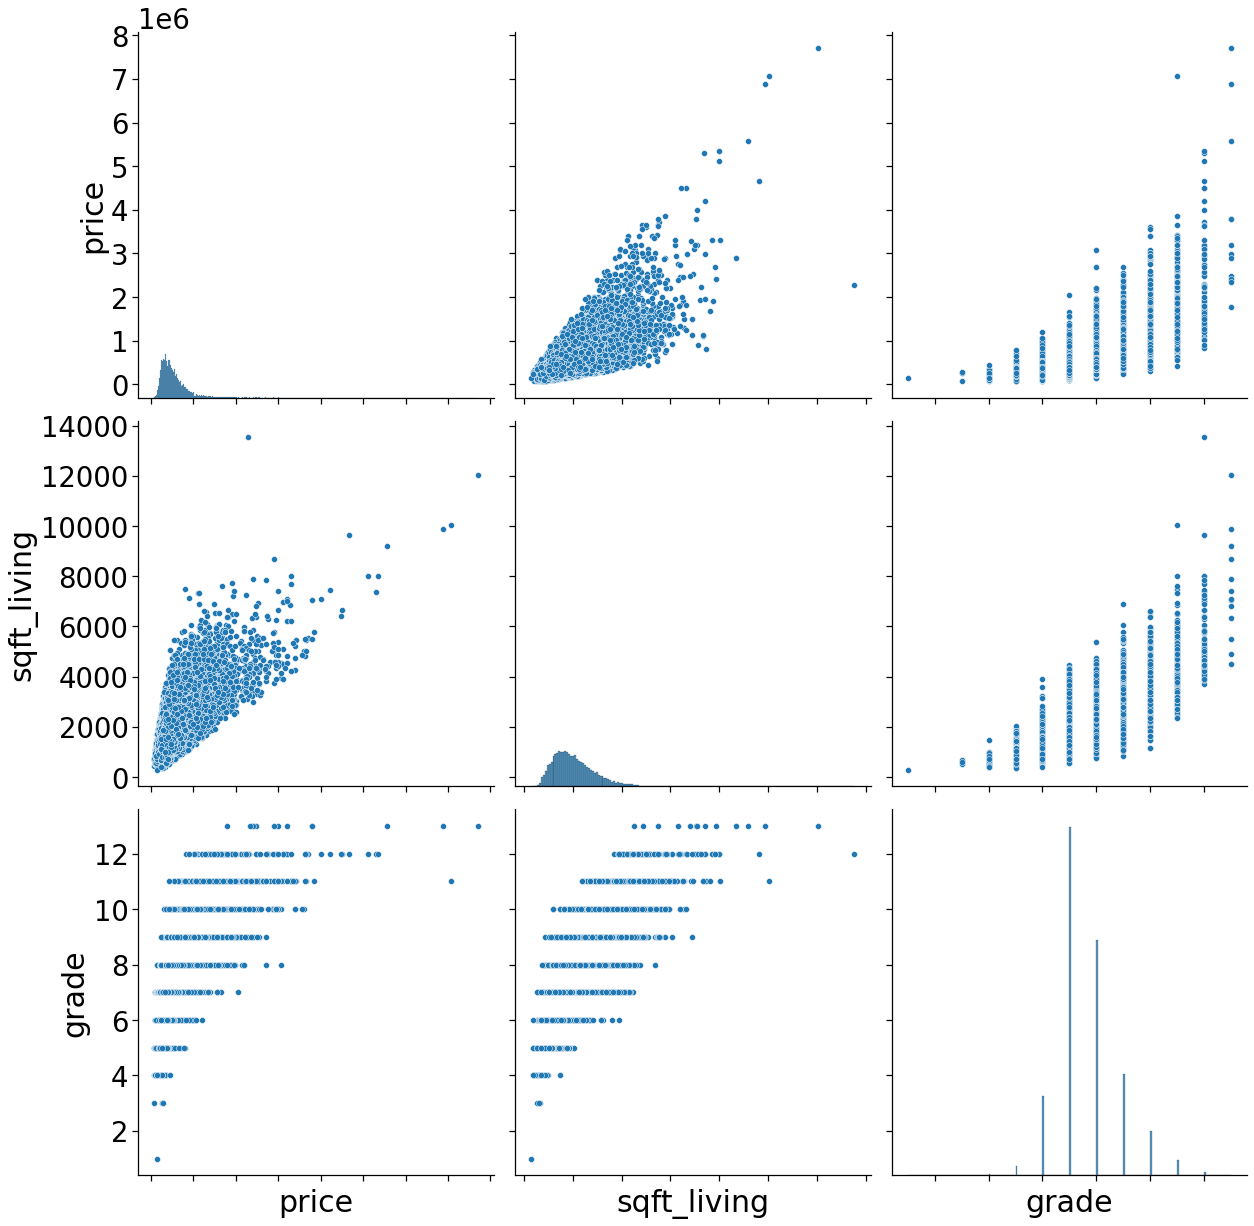

In [ ]:
import seaborn as sns

with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(data[['price','sqft_living','grade']], 
                 palette='tab20',height=6)
g.set(xticklabels=[])

In [ ]:
model = LinearRegression(fit_intercept=True).fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")


print(f"intercept: {model.intercept_}")


print(f"coefficients: {model.coef_}")

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")


coefficient of determination: 0.5345023805351069
intercept: -598108.9861714345
coefficients: [  184.42020584 98554.7981385 ]
predicted response:
[309390.44368979 565734.52980799 135223.36115671 ... 279883.21075532
 485401.72828127 279883.21075532]


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(x)
print(X)

ols = sm.OLS(y, X)
ols_result = ols.fit()
print(ols_result.summary())

[[1.00e+00 1.18e+03 7.00e+00]
 [1.00e+00 2.57e+03 7.00e+00]
 [1.00e+00 7.70e+02 6.00e+00]
 ...
 [1.00e+00 1.02e+03 7.00e+00]
 [1.00e+00 1.60e+03 8.00e+00]
 [1.00e+00 1.02e+03 7.00e+00]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:00:43   Log-Likelihood:            -2.9934e+05
No. Observations:               21613   AIC:                         5.987e+05
Df Residuals:                   21610   BIC:                         5.987e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef   

In [ ]:
x_new = [[1000, 7], [500, 7], [500, 9]]
print(x_new)

y_new = model.predict(x_new)
print(y_new)

[[1000, 7], [500, 7], [500, 9]]
[276194.80663851 183984.70371829 381094.2999953 ]


[-20.19869943  63.06859979]


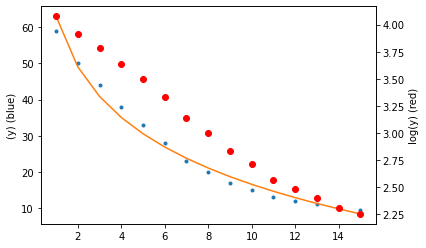

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

x = np.arange(1, 16, 1)
y = np.array([59, 50, 44, 38, 33, 28, 23, 20, 17, 15, 13, 12, 11, 10, 9.5])

fit = np.polyfit(np.log(x), y, 1)

print(fit)

alpha = fit[1]
beta = fit[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, '.')
ax.set_ylabel('(y) (blue)')



ax2 = ax.twinx()
ax2.scatter(x, np.log(y), color='red')
ax2.set_ylabel('log(y) (red)')

ax.plot(x, alpha + beta * np.log(x), '-')


plt.show()